In [4]:
import numpy as np
# 初始化一个2*2的线性相关矩阵。
M=np.array([[1,2],[2,4]])
# 计算2*2线性相关矩阵的秩。
np.linalg.matrix_rank(M, tol=None)

1

[[ 12.44580354  -4.71301307]
 [ 16.52024316 -13.07467145]
 [-18.84669917  10.71445517]
 ..., 
 [ 24.11866393   5.78704701]
 [ 29.35116343  -3.41363019]
 [-24.99383555  11.79116589]]


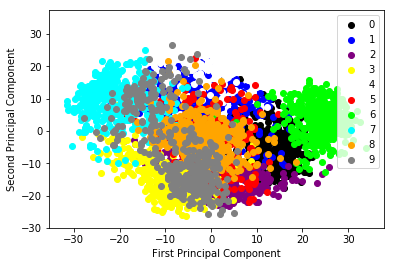

In [8]:
import pandas as pd
# 从互联网读入手写体图片识别任务的训练数据
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

X_digits = digits_train[np.arange(64)]
# np.arange(64)
y_digits = digits_train[64]

from sklearn.decomposition import PCA

# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA。 
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)
print X_pca



[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  True  True]
[ 12.44580354  16.52024316]
[ 12.44580354  16.52024316 -18.84669917]
[ 12.44580354  16.52024316 -18.84669917]
[ True  

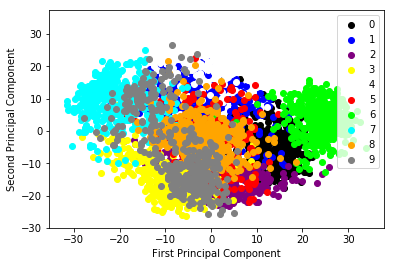

In [58]:
# 显示10类手写体数字图片经PCA压缩后的2维空间分布。
from matplotlib import pyplot as plt

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y_digits.as_matrix() == i]
        print X_pca[0:3, 0]
        print X_pca[0:3, 0][pd.Series([1==1,1==1,1==1]).as_matrix()]
        print pd.Series([1==1,1==1,1==1]).as_matrix()
        print X_pca[0:2, 0][pd.Series([True,True]).as_matrix()]
        py = X_pca[:, 1][y_digits.as_matrix() == i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()

In [59]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 导入基于线性核的支持向量机分类器。
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

estimator=PCA(n_components=20)

# 利用训练特征决定（fit）20个正交维度的方向，并转化（transform）原训练特征。
pca_X_train = estimator.fit_transform(X_train)
# 测试特征也按照上述的20个正交维度方向进行转化（transform）。
pca_X_test = estimator.transform(X_test)

pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)

In [60]:
from sklearn.metrics import classification_report

print svc.score(X_test, y_test)
print classification_report(y_test, y_predict, target_names=np.arange(10).astype(str))

print pca_svc.score(pca_X_test, y_test)
print classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str))

0.918196994992
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       178
          1       0.84      0.93      0.88       182
          2       0.99      0.97      0.98       177
          3       1.00      0.77      0.87       183
          4       0.96      0.97      0.96       181
          5       0.90      0.97      0.93       182
          6       0.99      0.98      0.99       181
          7       0.98      0.89      0.93       179
          8       0.94      0.78      0.85       174
          9       0.71      0.96      0.82       180

avg / total       0.93      0.92      0.92      1797

0.908736783528
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       178
          1       0.79      0.89      0.84       182
          2       0.95      0.98      0.96       177
          3       0.98      0.89      0.93       183
          4       0.93      0.93      0.93       181
          5 